## Golden Section Search
* The golden-section search is a technique for finding an extremum (minimum or maximum) of a function inside a specified interval.
* For a strictly unimodal function with an extremum inside the interval, it will find that extremum, while for an interval containing multiple extrema (possibly including the interval boundaries), it will converge to one of them.
* If the only extremum on the interval is on a boundary of the interval, it will converge to that boundary point. 
* The method operates by successively narrowing the range of values on the specified interval, which makes it relatively slow, but very robust.

In [30]:
def f(x):
    if x == 0:
        x = 10e-16

    return (x**2 - 2*x + 12/x)

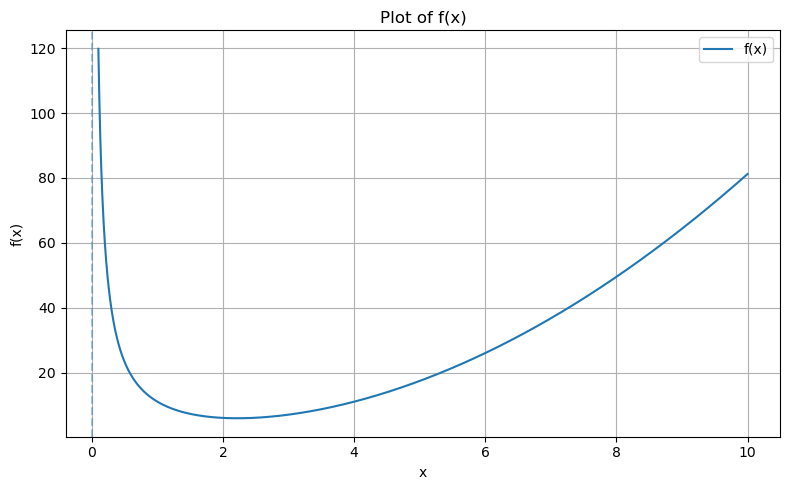

In [31]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.1, 10, 2000)
y = np.array([f(xi) for xi in x])

plt.figure(figsize=(8, 5))
plt.plot(x, y, label="f(x)")
plt.axvline(0, linestyle="--", alpha=0.4)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plot of f(x)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
def w(x, a, b):
    """Mapping the search space (a, b) in (0, 1)"""
    return (x - a) / (b - a)

def w0(x, a, b):
    """Mapping the back to (a, b)"""
    return a + x * (b - a)

def minimizeGoldenSectionSearchMethod(a, b, c):
    aw = w(a, a, b)
    bw = w(b, a, b)
    phi = 0.618         # Golden Number

    iteration = 1
    while True:
        lw = bw - aw
        print(f"{iteration}: {round(w0(aw, a, b), 4)} to {round(w0(bw, a, b), 4)}")
        if abs(lw) <= c:
            print(f"Converged in {iteration} iterations.")
            print(f"Minima: {(w0(aw, a, b) + w0(bw, a, b))/2}")
            return w0(aw, a, b), w0(bw, a, b)

        w1 = aw + (phi * lw)
        w2 = bw - (phi * lw)
        fw1 = f(w0(w1, a, b))
        fw2 = f(w0(w2, a, b))

        if fw1 < fw2:   # f(w1) < f(w2). Minimum is in [w2, bw]
            aw = w2
        else:           # f(w2) < f(w1). Minimum is in [aw, w1].
            bw = w1

        iteration += 1

In [33]:
minimizeGoldenSectionSearchMethod(0.1, 10, 10e-8)

1: 0.1 to 10.0
2: 0.1 to 6.2182
3: 0.1 to 3.881
4: 1.5444 to 3.881
5: 1.5444 to 2.9884
6: 1.5444 to 2.4368
7: 1.8853 to 2.4368
8: 2.096 to 2.4368
9: 2.096 to 2.3066
10: 2.1764 to 2.3066
11: 2.1764 to 2.2569
12: 2.2072 to 2.2569
13: 2.2072 to 2.2379
14: 2.2072 to 2.2261
15: 2.2144 to 2.2261
16: 2.2144 to 2.2217
17: 2.2172 to 2.2217
18: 2.2172 to 2.2199
19: 2.2182 to 2.2199
20: 2.2182 to 2.2193
21: 2.2186 to 2.2193
22: 2.2186 to 2.219
23: 2.2186 to 2.2189
24: 2.2187 to 2.2189
25: 2.2187 to 2.2188
26: 2.2187 to 2.2188
27: 2.2188 to 2.2188
28: 2.2188 to 2.2188
29: 2.2188 to 2.2188
30: 2.2188 to 2.2188
31: 2.2188 to 2.2188
32: 2.2188 to 2.2188
33: 2.2188 to 2.2188
34: 2.2188 to 2.2188
35: 2.2188 to 2.2188
Converged in 35 iterations.
Minima: 2.2187766747585442


(2.2187762873106083, 2.2187770622064806)